

*   **PROJECT** : Salary Prediction


---*Problem on Hand*: Given a data set which captures gross salary from July 1, 2013 through June 30, 2014 and includes only those employees who were employed on June 30, 2014 Predict the Salaries for Employees in Blatimore.






In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset
df = pd.read_csv("/content/train.csv")
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


* There are 7 columns and 18981 rows.
* All columns are object type.

* It's a good practice always to make a copy of your original data so we always have backup data to start working with.

In [4]:
df_copy =df.copy()
df_copy.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [5]:
df_copy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

* As you can see the column " Name" begins with spaces, which might create problem further, so we'll remove it.

In [6]:
df_copy.columns = df_copy.columns.str.strip()

print("Column names after removing leading spaces:", df_copy.columns)

Column names after removing leading spaces: Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


In [7]:
df_copy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

* so we find that two columns named HireDate and Grosspay have 70 & 3223 null values respectively, which we'll have to clean.

** Since Hiredate only has 70 null values which is less than 1%.So we'll drop these rows.

In [8]:
df_copy.dropna(subset=['HireDate'],inplace=True)
df_copy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

* Now that there are no null values in HireDate, moving onto Grosspay.

In [9]:
# Since Grosspay and AnnualSalary are very correleated and contains a lot of null values.
# we can remove grosspay from our data,cause there is only one dependent variable needed.

df_copy = df_copy.drop('GrossPay',axis=1)
df_copy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

# Checking Value Counts for all columns.

In [10]:
df_copy['Agency'].value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
M-R Labor Commissioner         6
Council Services               6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

* There are 65 agencies in baltimore , of which Youth Summer followed by police department have most number of employees.

In [11]:
df_copy['AgencyID'].value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02584      1
W02698      1
B68080      1
W02674      1
W07901      1
Name: AgencyID, Length: 1177, dtype: int64

* opposite to  common beleif number of agency id's(1177)are not equal to number of companies(65), which means one single agency may have different id depending upon department or job role. Lets verify it.

In [12]:
df_copy['JobTitle'].value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
LAW CLERK/BAILIFF (GRADUATE)         1
FUEL SYSTEMS SPECIALIST              1
Program Compliance Supervisor        1
EDP DATA TECHNICIAN SUPERVISOR       1
Senior Criminal Justice Asso         1
Name: JobTitle, Length: 1073, dtype: int64

* There are total 1073 jobtitles , in which AIDE BLUE CHIP and Police Officer are two most frequent.

In [13]:
df_copy['HireDate'].value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
07/19/1995       1
06/12/2004       1
01/14/1988       1
06/02/1987       1
02/10/1973       1
Name: HireDate, Length: 4737, dtype: int64

* The format of date mentioned is mm/dd/yyyy.
* most number of people were apoointed on 21May 2014.

In [14]:
df_copy['AnnualSalary'].value_counts()

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      162
              ... 
$72685.00        1
$51410.00        1
$114660.00       1
$15422.00        1
$37974.00        1
Name: AnnualSalary, Length: 1590, dtype: int64

* You can see this column has dollar($) attached to every value which can cause problem in future. So let's remove it.

In [15]:
df_copy['AnnualSalary'] = df_copy['AnnualSalary'].apply(lambda x:(float)(str(x)[1:]))
df_copy['AnnualSalary'].value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

** Now lets break the date into year,month and day.

In [16]:
df_copy['HireYear']= df_copy['HireDate'].apply(lambda x : (int)(str(x[6:])))
df_copy['HireMonth']= df_copy['HireDate'].apply(lambda x : (int)(str(x[:2])))
df_copy['HireDay']= df_copy['HireDate'].apply(lambda x : (int)(str(x[3:5])))

df_copy.info()
df_copy.head(6)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireYear      18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireDay       18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireYear,HireMonth,HireDay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,2013,6,10
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,1979,10,24
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,2006,9,25
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,2009,7,23
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,2013,7,24
5,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology,05/01/2013,52000.0,2013,5,1


*Trimming all categorical columns to make sure there are no leading spaces,trailing spaces or double space between them*

In [17]:
df_copy['Agency'] =   df_copy['Agency'].apply(lambda x: str(x).strip().replace("  "," "))
df_copy['AgencyID']=  df_copy['AgencyID'].apply(lambda x: str(x).strip().replace("  "," "))
df_copy['JobTitle']=  df_copy['JobTitle'].apply(lambda x: str(x).strip().replace("  "," "))

It can also be seen that some of the job titles are in Upper case. so with Lower and with mix of both which might effect analysis, so converting them to uppercase and also converting Agency and AgencyID

In [18]:
df_copy['JobTitle'] = df_copy['JobTitle'].apply(lambda x :str(x).upper())
df_copy['AgencyID'] = df_copy['AgencyID'].apply(lambda x :str(x).upper())
df_copy['Agency']   = df_copy['Agency'].apply(lambda x :str(x).upper())

The last thing remaining ,before completing  data preparation is outliers treatment. So lets see it graphically using box plot.

<function matplotlib.pyplot.show>

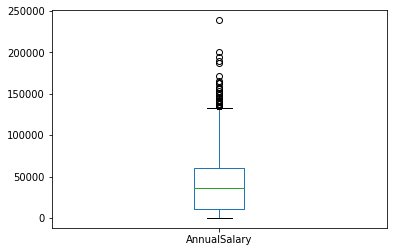

In [19]:
df_copy['AnnualSalary'].plot.box()
plt.show

It's clearly visible that almost 75% values are only till 1,50,000. Everything after that is an outlier, so we'll remove them cause they can affect our results in future.

In [20]:
df_copy = df_copy[df_copy['AnnualSalary']<150000] 
df_copy.shape

(18895, 9)

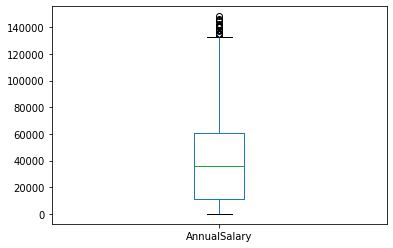

In [21]:
# lets visualise after updation in dataset
df_copy['AnnualSalary'].plot.box()
plt.show()

* As all the values above 75% line are very close. so we'll leave them as they are. Now lets move further in project.

# Exploratory Data Analysis(EDA) 

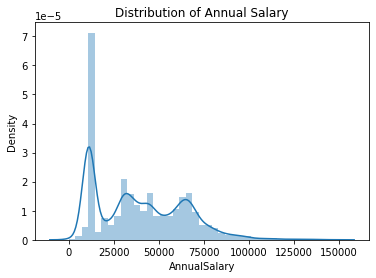

In [22]:
# lets check distribution of AnnualSalary using dist.plot.
sb.distplot(df_copy['AnnualSalary'])
plt.title("Distribution of Annual Salary", fontsize = 12)
plt.show()

Most of the values in salary column is between 0 to 25000, also after 10,0000 the line almost touches axis.So very few people have salary greater than 10,0000.

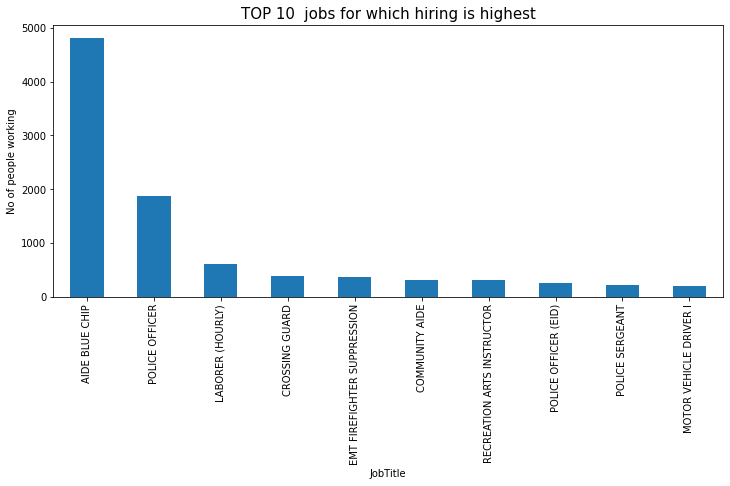

In [23]:
# lets check jobs for which people are hired most
# top 10 jobs based on hiring.
plt.figure(figsize=(12,5))
df_copy.groupby(['JobTitle'])['Name'].count().sort_values(ascending= False).head(10).plot.bar()
plt.title('TOP 10  jobs for which hiring is highest', fontsize= 15)
plt.ylabel('No of people working')
plt.show()

* AIDE BLUE CHIP and POLICE OFFICER are the two most hiring jobs, where AIDE BLUE CHIP have more than double of people working as POLICE OFFICER.

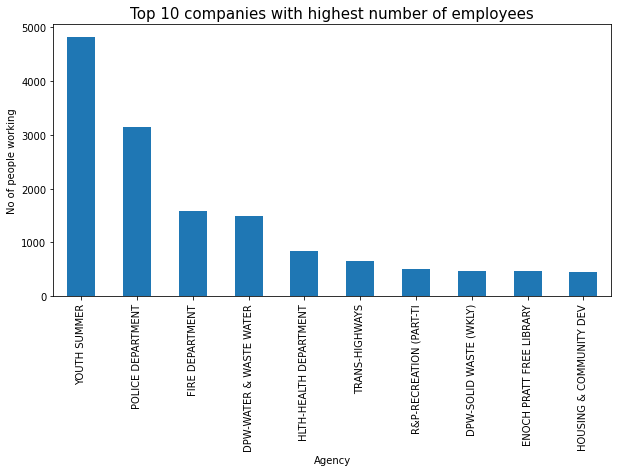

In [24]:
# lets check the top 10 agencies which hires max people
plt.figure(figsize=(10,5))
df_copy.groupby(['Agency'])['Name'].count().sort_values(ascending = False).head(10).plot.bar()
plt.title("Top 10 companies with highest number of employees",fontsize=15)
plt.ylabel("No of people working")
plt.show()

* Youth Summer is leading hiring company followed by police department. 
* Fire department and DPW_WATER & WASTE WATER have almost same number of employees.

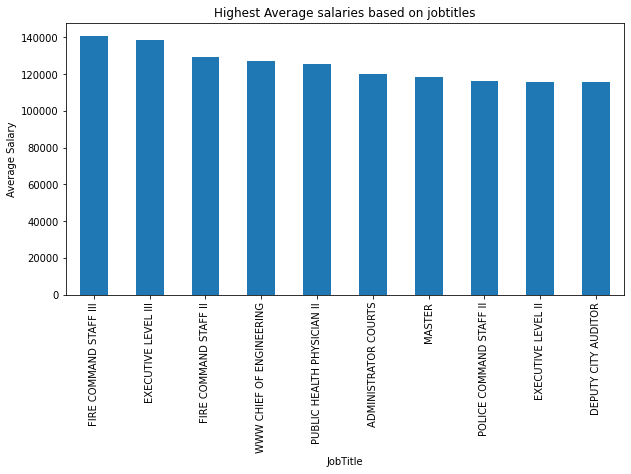

In [25]:
# lets see the salaries based on jobtitle
plt.figure(figsize=(10,5))
df_copy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending= False).head(10).plot.bar()
plt.ylabel('Average Salary')
plt.title("Highest Average salaries based on jobtitles", fontsize=12)
plt.show()

* The above grapgh clearly shows the top 10 jobs which pays most.

In [26]:
# lets check how many jobs pay more than the average salary
mean_salary = df_copy['AnnualSalary'].mean()

good_pay_jobs = df_copy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_pay_jobs[good_pay_jobs['AnnualSalary']>mean_salary]['JobTitle'].count()

798

* As we found above that there were total 1073 jobs so out of them 798 pays more than average pay in baltimore.

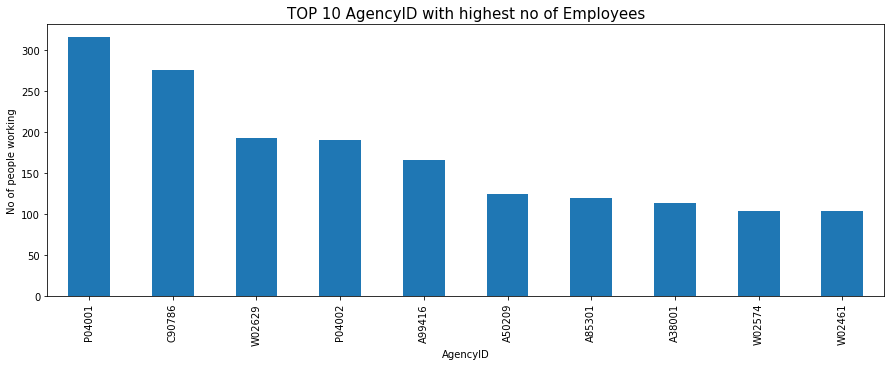

In [27]:
# Top 10 agencyId's with max number of employees

plt.figure(figsize=(15,5))
df_copy.groupby(['AgencyID'])['Name'].count().sort_values(ascending= False).head(10).plot.bar()
plt.title("TOP 10 AgencyID with highest no of Employees",fontsize=15)
plt.ylabel("No of people working")
plt.show()

* The P0401 has maximum no of employees followed by C90786.

* Let us see which hiring year have highest or lowest salaries. This is to check if salary increase with decrease in year so as to see does it increases with experience.

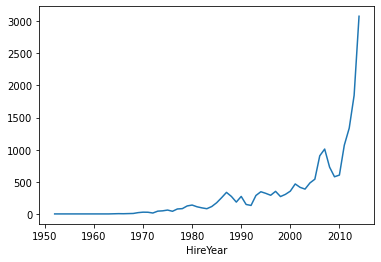

In [28]:
df_copy.groupby(['HireYear'])['AnnualSalary'].count().plot()
plt.show()

* we can see the salary is increasing with increase in year.
* let's visualise in deep.

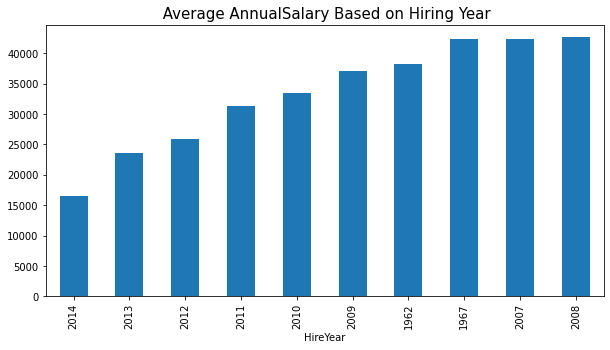

In [29]:
plt.figure(figsize=(10,5))
df_copy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values(ascending= True).head(10).plot.bar()
plt.title(" Average AnnualSalary Based on Hiring Year",fontsize=15)
plt.show()

* The trend above shows the salary increases as your experience increases in company. So now lets calculate experience in days in agency.

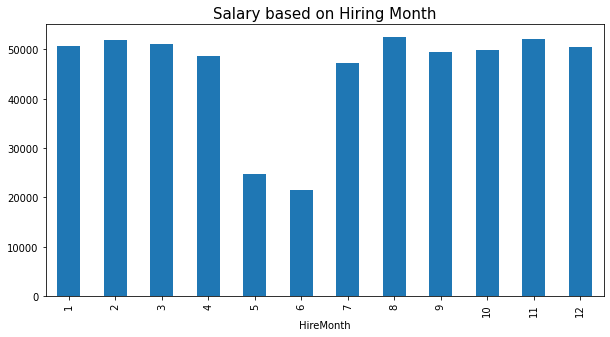

In [30]:
# lets check if hrirng month have any effect on AnnualSalary

plt.figure(figsize=(10,5))
df_copy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.title("Salary based on Hiring Month", fontsize=15)
plt.show()


* this graph shows that almost all months when people are hired have same salaries except for month number 5,6.
* this maybe because big companies, doesnt hire much in these months. Lets verify the same:

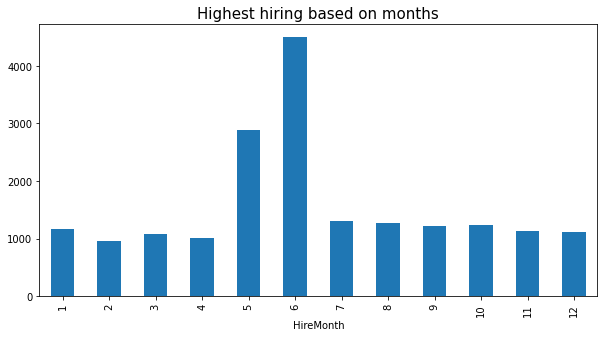

In [31]:
plt.figure(figsize=(10,5))
df_copy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.title("Highest hiring based on months",fontsize=15)
plt.show()

* Against our conception, the maximum hiring is in months number 5,6.But they have relative lower salaries compared to other months.

<Figure size 720x360 with 0 Axes>

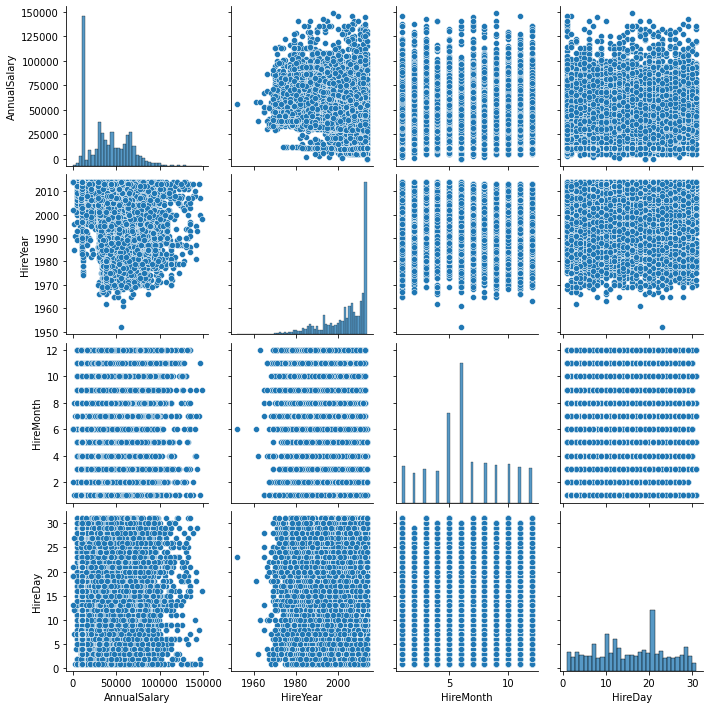

In [32]:
#lets check correlations if any between numerical columns using pairplot
plt.figure(figsize=(10,5))
sb.pairplot(df_copy)
plt.show()

Since nothing is clearly noticeable. lets use heatmap.

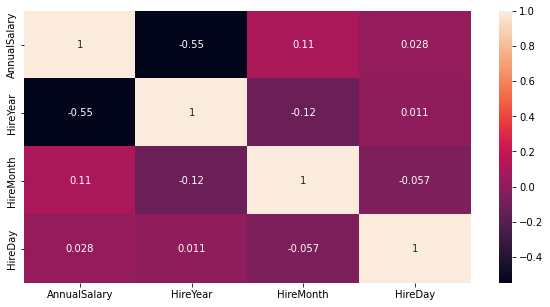

In [33]:
plt.figure(figsize=(10,5))
sb.heatmap(df_copy.corr(),annot=True)

* only Hireyear seems to have maximum correlation(negative) with annualsalary.
* which proves our previous conclusion that as experience goes up salary also goes up.

# **Feature Engineering**

In [34]:
# lets create a copy of data before model building,incase our model didn't work
# we can always come back here and build new model starting with this data

df_salary = df_copy.copy()
df_salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireYear,HireMonth,HireDay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,2013,6,10
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,1979,10,24
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,2006,9,25
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,2009,7,23
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,2013,7,24


* Since linear machine learning models only work with numerical columns.
* Here we'll do feature encodindg(mean encoding particularly)to convert the categorical columns into numerical.

In [36]:
# Apply mean encoding to job_title
mean_job = df_salary.groupby(['JobTitle'])['AnnualSalary'].mean()
df_salary['JobTitle']= df_salary['JobTitle'].map(mean_job)

In [37]:
print(df_salary['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [39]:
# Apply mean encoding to Agency
mean_Agency = df_salary.groupby(['Agency'])['AnnualSalary'].mean()
df_salary['Agency'] = df_salary['Agency'].map(mean_Agency)
print(df_salary['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [41]:
# Apply mean encoding to Agencyid
mean_id = df_salary.groupby(['AgencyID'])['AnnualSalary'].mean()
df_salary['AgencyID'] = df_salary['AgencyID'].map(mean_id)
print(df_salary['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


In [42]:
# Since we converted all to numerical, lets verify the same
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireYear      18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireDay       18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


* Only Name and HireDate are two categorical columns.
* Since we have HireYear, HireMonth and HireDay we dont need HireDate further.
* Also salary can never depends on someone's name, so it's safe to remove both columns.

In [44]:
df_salary = df_salary.drop(['HireDate','Name'],axis=1)
df_salary


,JobTitle,AgencyID,Agency,AnnualSalary,HireYear,HireMonth,HireDay
0,11313.967200,11310.000000,11313.967200,11310.0,2013,6,10
1,47443.500000,46667.000000,51495.424242,53428.0,1979,10,24
2,69750.666667,65926.133333,64874.560224,68300.0,2006,9,25
3,57940.000000,48071.851064,39980.900360,62000.0,2009,7,23
4,44531.160494,44012.307229,61506.879579,43999.0,2013,7,24
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11313.967200,11310.0,2014,5,21
18977,11313.967200,11310.000000,11313.967200,11310.0,2014,5,21
18978,44531.160494,44012.307229,61506.879579,43999.0,2013,12,17
18979,60588.139335,60203.340426,61506.879579,44104.0,2013,1,23


* Now we have removed irrelevant features lets move to splitting data for training and testing

# Train-Test-Split:

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_salary,train_size=0.7,random_state=3)
print(X_train.shape)
print(X_test.shape)


(13226, 7)
(5669, 7)


* as we have splitted data into Train and test , now we need to separate the independent(x) and dependent variable(y).

In [47]:
y_train = X_train.pop('AnnualSalary')
x_train = X_train

y_test = X_test.pop('AnnualSalary')
x_test = X_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13226, 6)
(13226,)
(5669, 6)
(5669,)


In [49]:
# Standard scaling to standardize all independent features in closed fixed range.

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

x_train[x_train.columns] = Scaler.fit_transform(x_train[x_train.columns])

x_train.describe()


,JobTitle,AgencyID,Agency,HireYear,HireMonth,HireDay
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,-2.797257e-16,1.233576e-16,1.856304e-16,3.543075e-15,2.805525e-16,2.555209e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.544026e+00,-1.688880e+00,-1.399966e+00,-5.007399e+00,-1.821518e+00,-1.768635e+00
25%,-1.162275e+00,-1.271266e+00,-1.348626e+00,-5.825378e-01,-4.631275e-01,-8.132807e-01
50%,-1.486675e-01,8.650468e-02,1.377734e-01,2.831959e-01,-1.235298e-01,2.265409e-02
75%,8.573207e-01,9.003605e-01,1.038671e+00,8.603517e-01,5.556657e-01,7.391697e-01
max,4.148440e+00,4.622439e+00,2.227037e+00,9.565444e-01,1.914057e+00,1.813943e+00


In [51]:
# scaling the test 

x_test[x_test.columns] = Scaler.transform(x_test[x_test.columns])

x_test.describe()

,JobTitle,AgencyID,Agency,HireYear,HireMonth,HireDay
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.016856,-0.015381,-0.019185,0.007174,0.006702,-0.018107
std,0.991238,0.995365,0.995236,0.998745,1.004557,1.004814
min,-1.524188,-1.538059,-1.399966,-4.141665,-1.821518,-1.768635
25%,-1.162275,-1.271266,-1.348626,-0.582538,-0.463127,-0.813281
50%,-0.151992,0.082652,0.137773,0.283196,-0.123530,0.022654
75%,0.857321,0.884694,1.038671,0.860352,0.895263,0.739170
max,4.148440,3.115867,2.227037,0.956544,1.914057,1.813943


# Model Building

In [53]:
# We are going to build a Linear regression model for this project
# lets import Linear Regression first.

from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 

In [55]:
# build model
salary_model = regressor.fit(x_train, y_train)

In [56]:
# lets check r-squared (score)
salary_model.score(x_train, y_train)

0.9650400010085465

* Our model has performed well on training data with approx 96% accuracy, which is pretty good.
* But inorder for it to be a good model it should also perform almost equally well on testing data.

In [57]:
salary_model.score(x_test,y_test)

0.9630294099372619

** The model performed well on test data too, witch rsquared of 96%, so our model is good model and can be used to predict salaries in baltimore.

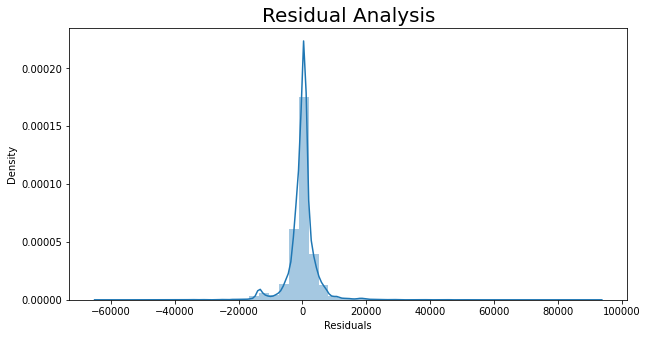

In [66]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_model.predict(x_train)
res = y_train - y_train_pred
sb.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

* The residual terms are equally distributed at 0, which is also one assumption of linear regresssion, which means our model is working properly.

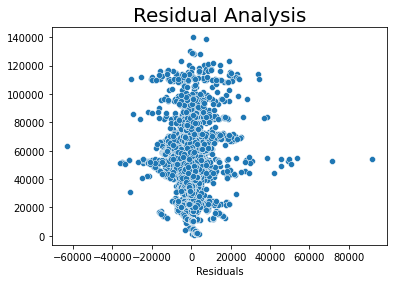

In [67]:
# scatterplot
sb.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

* The residuals are independent of each other, which is the second assumption of linear regression.

In [68]:
# lets check the coefficient and intercept generated by model
intercept = salary_model.intercept_
print("Intercept is", intercept)

coefficient = salary_model.coef_
print("Coefficient is ", coefficient)

Intercept is 39671.21108800848
Coefficient is  [22243.43148569  2779.52672807 -1601.21956264 -2080.22856057
  -157.5181807    -40.62507384]


In [71]:
# let us create a model generalisation equation
model = str(intercept) 
for i in range(len(coefficient)):
  model = model + ' + ' +(str(coefficient[i])) + ' * ' +(str(x_train.columns[i]))

print(model)

39671.21108800848 + 22243.43148568698 * JobTitle + 2779.5267280723483 * AgencyID + -1601.2195626430257 * Agency + -2080.228560568372 * HireYear + -157.51818069813112 * HireMonth + -40.62507383835735 * HireDay


# conclusions:
* Of all the features given AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
* Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.

*** THE END***